<a href="https://colab.research.google.com/github/sudhanshugarg/kaggle/blob/main/annotated_dataset_for_knee_arthritis_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount your Google Drive.
from google.colab import drive
BASE_DIR = "/content/drive"
drive.mount(BASE_DIR)


# Unmount your Google Drive
# drive.flush_and_unmount()

Mounted at /content/drive


In [3]:
KAGGLE_API_FILE = 'code/kaggle/kaggle.json'
assert KAGGLE_API_FILE is not None, "[!] Enter the KAGGLE_API_FILE location."

kaggle_creds_path = '{}/MyDrive/{}'.format(BASE_DIR, KAGGLE_API_FILE)
import sys

kaggle_download_path = '{}/MyDrive/code/kaggle'.format(BASE_DIR)


! pip install kaggle --quiet

#! mkdir ~/.kaggle
#! cp {kaggle_creds_path} ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json

dataset_name = 'annotated-dataset-for-knee-arthritis-detection'
# dataset_path = 'hafiznouman786/{}'.format(dataset_name)

# ! kaggle datasets download -d {dataset_path}

# fullpath = '{}/{}'.format(kaggle_download_path, dataset_name)
# ! mkdir -p $fullpath
# ! unzip {dataset_name + ".zip"} -d $fullpath


In [14]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
from typing import List
from IPython.display import Image, display


In [5]:

image_folder_path = '{}/{}/Training'.format(kaggle_download_path, dataset_name)

In [25]:
import tensorflow_datasets as tfds

# 2nd way to read training data
data_train_raw, data_validation_raw = tf.keras.utils.image_dataset_from_directory(
    image_folder_path,
    label_mode='categorical',
    color_mode='rgb',
    image_size=(162,300),
    batch_size=16,
    validation_split=0.3,
    subset="both",
    seed=157
)

normalization_layer = tf.keras.layers.Rescaling(1./255)

data_train = data_train_raw.map(lambda x, y: (normalization_layer(x), y))
data_validation = data_validation_raw.map(lambda x, y: (normalization_layer(x), y))


Found 1650 files belonging to 5 classes.
Using 1155 files for training.
Using 495 files for validation.


In [26]:
data_train

<_MapDataset element_spec=(TensorSpec(shape=(None, 162, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [27]:
data_validation

<_MapDataset element_spec=(TensorSpec(shape=(None, 162, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [28]:
# typical architecture for CNNs is
# (Conv2D, ReLU, MaxPooling) x N, Flatten, Dense (FCN), output


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='same', input_shape=(162, 300, 3)),
  tf.keras.layers.ReLU(),
  tf.keras.layers.MaxPooling2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same'),
  tf.keras.layers.ReLU(),
  tf.keras.layers.MaxPooling2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same'),
  tf.keras.layers.ReLU(),
  tf.keras.layers.MaxPooling2D(pool_size=2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation=None)
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 162, 300, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 162, 300, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 81, 150, 8)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 81, 150, 16)         │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 81, 150, 16)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 40, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 40, 75, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 40, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 23680)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,515,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,521,941 (5.81 MB)

 Trainable params: 1,521,941 (5.81 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)


In [31]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy', 'auc'])

In [ ]:
model.fit(data_train, epochs=120)

Epoch 1/120
18/73 ━━━━━━━━━━━━━━━━━━━━ 2:06 2s/step - accuracy: 0.2451 - auc: 0.5365 - loss: 0.6003

In [ ]:
model.evaluate(data_validation, verbose=2)

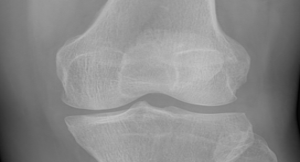

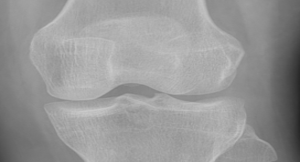

In [15]:
file1_path = '{}/0Normal/NormalG0 (1).png'.format(image_folder_path)
file2_path = '{}/0Normal/NormalG0 (2).png'.format(image_folder_path)


listOfImageNames = [file1_path, file2_path]

for imageName in listOfImageNames:
    display(Image(filename=imageName))

In [16]:
import cv2

In [17]:
img = cv2.imread(file1_path, cv2.IMREAD_COLOR)


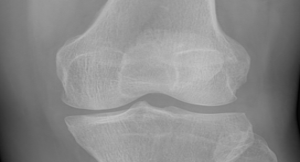

In [18]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

array([[[115, 115, 115],
        [115, 115, 115],
        [115, 115, 115],
        ...,
        [ 97,  97,  97],
        [ 95,  95,  95],
        [ 93,  93,  93]],

       [[113, 113, 113],
        [114, 114, 114],
        [115, 115, 115],
        ...,
        [ 96,  96,  96],
        [ 94,  94,  94],
        [ 93,  93,  93]],

       [[113, 113, 113],
        [114, 114, 114],
        [116, 116, 116],
        ...,
        [ 95,  95,  95],
        [ 95,  95,  95],
        [ 93,  93,  93]],

       ...,

       [[ 11,  11,  11],
        [ 23,  23,  23],
        [ 31,  31,  31],
        ...,
        [ 53,  53,  53],
        [ 52,  52,  52],
        [ 49,  49,  49]],

       [[  9,   9,   9],
        [ 20,  20,  20],
        [ 28,  28,  28],
        ...,
        [ 54,  54,  54],
        [ 51,  51,  51],
        [ 49,  49,  49]],

       [[  6,   6,   6],
        [ 17,  17,  17],
        [ 25,  25,  25],
        ...,
        [ 55,  55,  55],
        [ 52,  52,  52],
        [ 49,  49,  49]]], dtype=uint8)
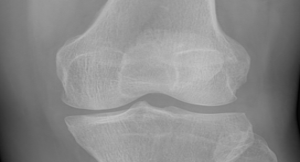

In [19]:
img

In [20]:
img_normalized = img / 255.0

In [22]:
# now lets create the training/validation/testing data

# take the Normal folder.
# take the Severe folder.
# take 70% of Normal and 70% of severe for training
# take 15% of Normal and 15% of severe for validation
# take 15% of Normal and 15% of severe for test

first_file_path = '{}/0Normal/NormalG0 ({}).png'.format(image_folder_path, 1)
first_img = cv2.imread(first_file_path, cv2.IMREAD_COLOR)

num_images = 2
normal_shape = np.append([num_images-1], first_img.shape)
normal_images = np.empty(shape=normal_shape, dtype=object)

for i in range(1, num_images):
  # print(i)
  file_path = '{}/0Normal/NormalG0 ({}).png'.format(image_folder_path, i)
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  normal_images[i-1] = img




In [ ]:
for element in small.as_numpy_iterator():
  x_elem, y_elem = element
  # print(x_elem.shape)
  # print(y_elem.shape)
  # print(y_elem)

In [ ]:
y_normal_images = np.zeros(num_images-1)

In [ ]:
y_normal_images.shape

(199,)

In [ ]:

first_severe_file_path = '{}/4Severe/SevereG4 ({}).png'.format(image_folder_path, 1)
first_severe_img = cv2.imread(first_severe_file_path, cv2.IMREAD_COLOR)

severe_shape = np.append([num_images-1], first_severe_img.shape)
severe_images = np.empty(shape=severe_shape, dtype=object)

for i in range(1, num_images):
  # print(i)
  file_path = '{}/4Severe/SevereG4 ({}).png'.format(image_folder_path, i)
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  severe_images[i-1] = img

y_severe_images = np.ones(num_images-1)

In [ ]:
y_severe_images.shape

(199,)

In [ ]:
y_severe_images

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
severe_images.shape

(199, 162, 300, 3)

In [ ]:
data_x = np.concatenate([normal_images, severe_images])
data_y = np.concatenate([y_normal_images, y_severe_images])

In [ ]:
data_x.shape

(398, 162, 300, 3)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=15, test_size=0.3, shuffle=True)
x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')


In [ ]:
x_train.shape

(278, 162, 300, 3)

In [ ]:
y_train.shape

(278,)

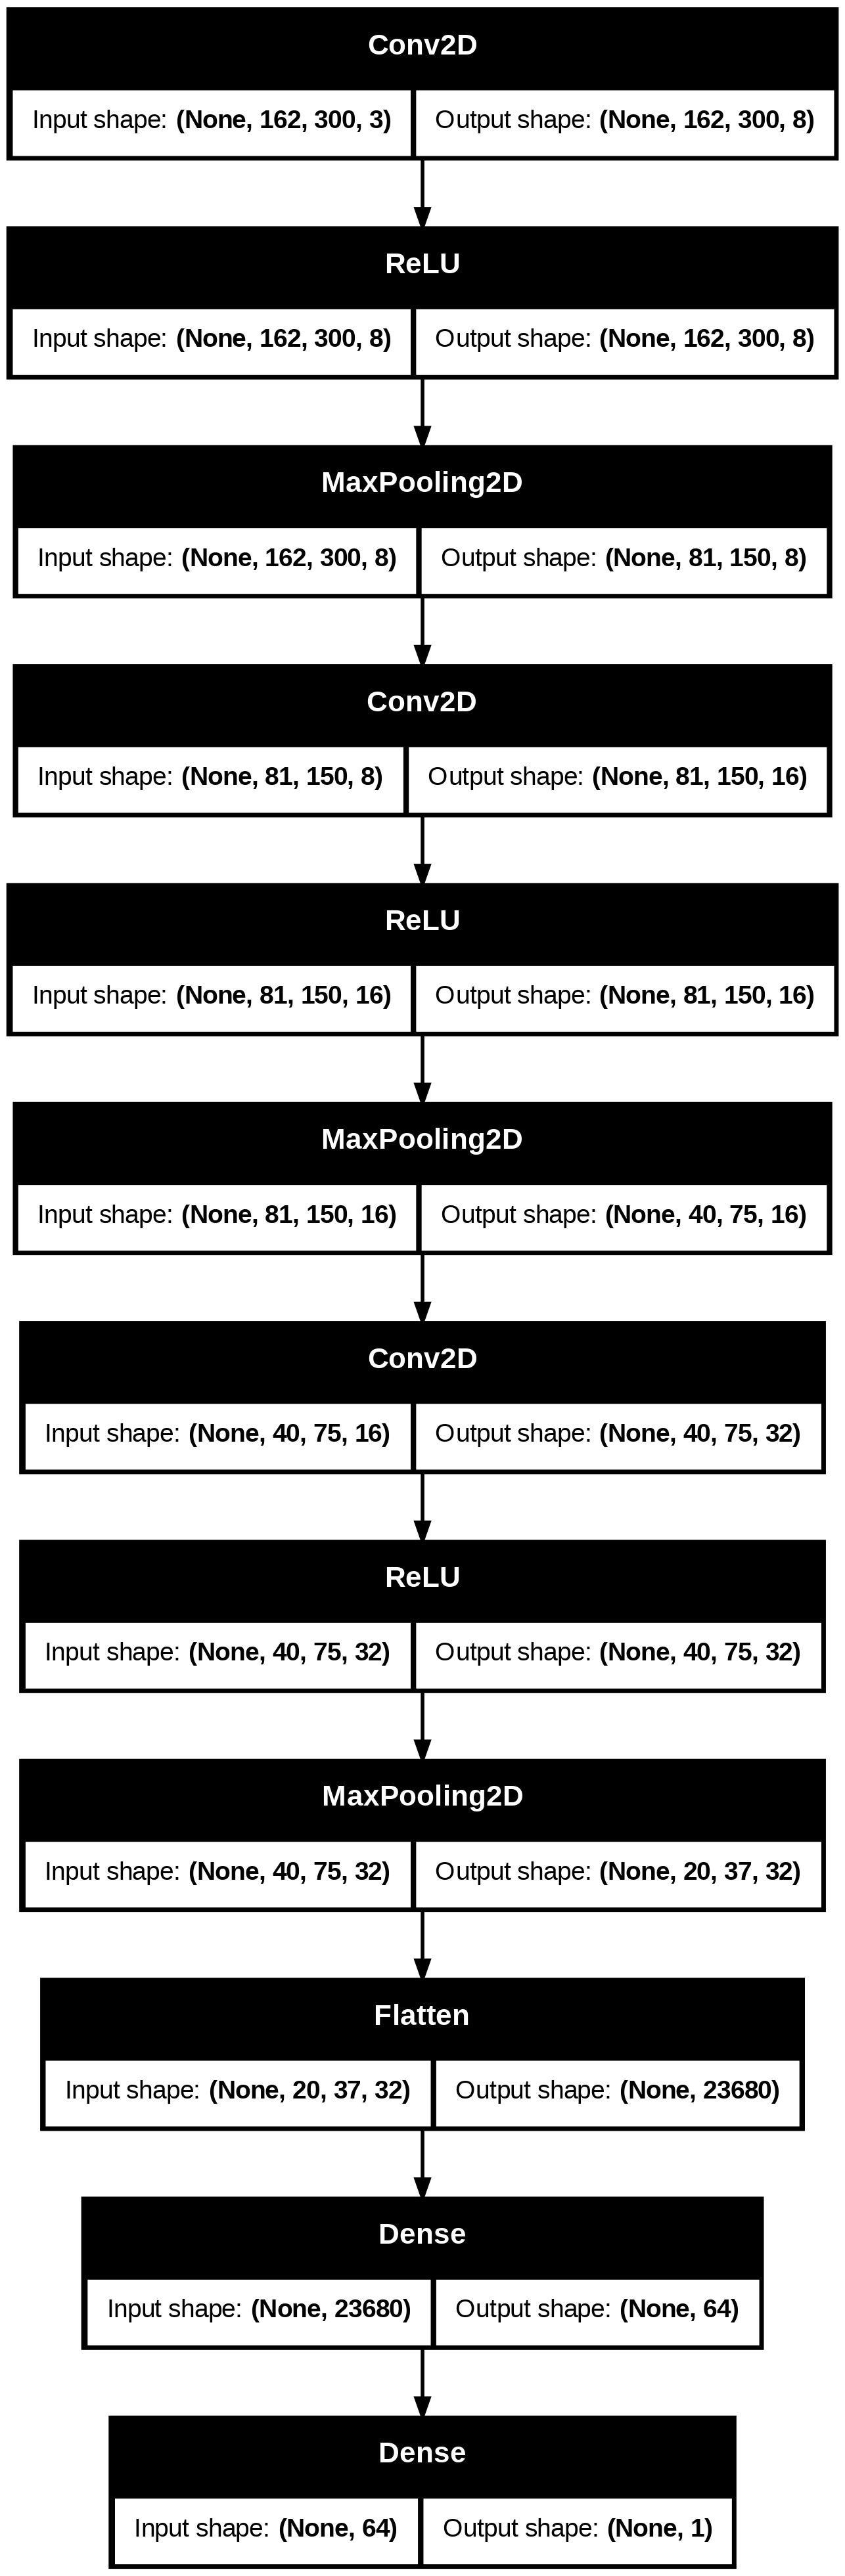

In [ ]:
keras.utils.plot_model(model, "cnn_arthritis.png", show_shapes=True, expand_nested=False)